<a href="https://colab.research.google.com/github/jmestralet/Proyecto_DS_Coderhouse/blob/main/ProyectoParteIII%2BMestralet_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al proyecto y objetivo

En el presente proyecto, se utiliza un dataset que representa la cartera de clientes de una empresa.

**Uno de los desafíos que presentan las cartera de clientes, es evitar que estas decrezcan, por lo que toma importancia detectar de forma preventiva un posible abandono de clientes** (fuga).

Partiendo de lo anterior, surge la pregunta **¿Es posible predecir la fuga de clientes?**
--

**Durante este trabajo, se buscará encontrar caracteristicas y/o patrones que permitan identificar clientes con alta propabilidad de fugarse.**

En este sentido, buscaré validar las siguientes **Hipotesis:**
--
* **Hipotesis Nula**:
Los datos y variables existentes, no son suficientes para identificar a grupos de clientes con posibilidad de fuga, con más de un 60% de probabilidad del modelo.

* **Hipotesis Alternativa**:
Los datos y variables existentes, son suficientes para identificar a grupos de clientes con posibilidad de fuga, con más de un 60% de probabilidad del modelo.


## Listado de **columnas del dataset** a utilizar

* ID de cliente:	Identificador único para cada cliente.
* Edad:	edad del cliente
* Género:	El género del cliente (Hombre, Mujer, Otro).
* Tipo de cuenta:	Tipo de cuenta (Corriente, Ahorro, Inversión).
* Saldo de la cuenta:	El saldo en la cuenta del cliente
* Fecha de transacción:	Fecha de la última transacción realizada por el cliente.
* Monto de la transacción:	Importe de la última transacción, indicando el compromiso del cliente.
* Tipo de transacción:	Tipo de la última transacción (Depósito, Retiro, etc.).
* Rama:	Ubicación de la sucursal donde se encuentra la cuenta.
* Monto del préstamo:	Importe de cualquier préstamo obtenido por el cliente.
* Puntuación crediticia:	La puntuación crediticia del cliente, que indica su salud financiera.
* Está_empleado:	Si el cliente está empleado (Verdadero/Falso).
* Ingresos anuales:	El ingreso anual total del cliente.
* Estado civil:	El estado civil del cliente (soltero, casado, etc.).
* Sucursal:	La región geográfica del cliente.
* Fecha de apertura de la cuenta:	La fecha en que se abrió la cuenta del cliente.
* Fecha de la última transacción:	Fecha de la más reciente transacción realizada por el cliente.
* Número_de_transacciones:	Número total de transacciones en el último año.
* Tendencia de actividad de la cuenta:	Si la actividad de la cuenta está aumentando, disminuyendo o es estable.
* Interacciones de servicio al cliente:	Número de interacciones con el servicio de atención al cliente que posiblemente indiquen insatisfacción.
* Quejas recientes:	Número de quejas realizadas por el cliente, que potencialmente indican insatisfacción.
* Cambio en el saldo de la cuenta:	Cambio en el saldo de la cuenta a lo largo del tiempo, lo que indica estabilidad o dificultad financiera.
* Puntuación de satisfacción del cliente:	Calificación de satisfacción del cliente (1-5)
* Estado del cliente:	Indica si el cliente ha abandonado el servicio (1) o no (0).
* Periodo de tiempo de abandono (meses)

**Fuente del dataset:** https://www.kaggle.com/datasets/simronw/churn-prediction-unlocking-retention-secrets



#Importación de librerías
Se importan todas las librerías que serán utilizadas en el proyecto

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import math
import warnings

#algunas configuraciones
warnings.filterwarnings('ignore')


# Configuración de gráficos

In [157]:
# Paleta categórica
palette = sns.color_palette("colorblind")

#Seaborn
sns.set_theme(style='whitegrid', palette=palette, font_scale=1.2)

#Matplotlib
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.autolayout'] = True
#plt.rcParams['axes.titleweight'] = 'bold'
colormap = plt.get_cmap('cividis')

# Carga del dataset y transformaciones iniciales
**El dataset se encuentra en formato csv**, por lo que se carga de la siguiente forma.

In [158]:
df = pd.read_csv('Abandono_de_clientes.csv', sep=';')

Antes de comenzar a explorar los datos, se traducen los nombres de las columnas a Español:

In [159]:
print('Columnas:')
df.columns


Columnas:


Index(['Customer_ID', 'Age', 'Gender', 'Account_Type', 'Account_Balance',
       'Transaction_Date', 'Transaction_Amount', 'Transaction_Type', 'Branch',
       'Loan_Amount', 'Loan_Type', 'Credit_Score', 'Is_Employed',
       'Annual_Income', 'Marital_Status', 'Region', 'Account_Open_Date',
       'Last_Transaction_Date', 'Number_of_Transactions',
       'Account_Activity_Trend', 'Customer_Service_Interactions',
       'Recent_Complaints', 'Change_in_Account_Balance',
       'Customer_Satisfaction_Score', 'Churn_Label', 'Churn_Timeframe'],
      dtype='object')

##Transformación de nombres de columnas

In [160]:
df=df.rename(columns={'Customer_ID':'Cliente_ID',
                      'Age':'Edad',
                      'Gender':'Genero',
                      'Account_Type':'Tipo de cuenta',
                      'Account_Balance':'Saldo de cuenta',
                      'Transaction_Date':'Fecha de transaccion',
                      'Transaction_Amount':'Monto de transaccion',
                      'Transaction_Type':'Tipo de transaccion',
                      'Branch':'Sucursal',
                      'Loan_Amount':'Monto de prestamo',
                      'Loan_Type':'Tipo de prestamo',
                      'Credit_Score':'Score crediticio',
                      'Is_Employed':'Es empleado',
                      'Annual_Income':'Ingreso anual',
                      'Marital_Status':'Estado Civil',
                      'Account_Open_Date':'Fecha de apertura de cuenta',
                      'Last_Transaction_Date':'Fecha de ultima transaccion',
                      'Number_of_Transactions':'Numero de transacciones',
                      'Account_Activity_Trend':'Tendencia de actividad en cuenta',
                      'Customer_Service_Interactions':'Interacciones de servicio al cliente',
                      'Recent_Complaints':'Quejas recientes',
                      'Change_in_Account_Balance':'Cambio en saldo de cuenta',
                      'Customer_Satisfaction_Score':'Puntuación de satisfacción del cliente',
                      'Churn_Label':'Estado del cliente',
                      'Churn_Timeframe':'Periodo de tiempo de abandono (meses)'})
print('Columnas renombradas:')
df.columns

Columnas renombradas:


Index(['Cliente_ID', 'Edad', 'Genero', 'Tipo de cuenta', 'Saldo de cuenta',
       'Fecha de transaccion', 'Monto de transaccion', 'Tipo de transaccion',
       'Sucursal', 'Monto de prestamo', 'Tipo de prestamo', 'Score crediticio',
       'Es empleado', 'Ingreso anual', 'Estado Civil', 'Region',
       'Fecha de apertura de cuenta', 'Fecha de ultima transaccion',
       'Numero de transacciones', 'Tendencia de actividad en cuenta',
       'Interacciones de servicio al cliente', 'Quejas recientes',
       'Cambio en saldo de cuenta', 'Puntuación de satisfacción del cliente',
       'Estado del cliente', 'Periodo de tiempo de abandono (meses)'],
      dtype='object')

Se visualizan algunos registros y columnas para observar la **estructura del dataframe**

In [161]:
print('Primeros 4 registros:')
df.head(4)

Primeros 4 registros:


,Cliente_ID,Edad,Genero,Tipo de cuenta,Saldo de cuenta,Fecha de transaccion,Monto de transaccion,Tipo de transaccion,Sucursal,Monto de prestamo,...,Fecha de apertura de cuenta,Fecha de ultima transaccion,Numero de transacciones,Tendencia de actividad en cuenta,Interacciones de servicio al cliente,Quejas recientes,Cambio en saldo de cuenta,Puntuación de satisfacción del cliente,Estado del cliente,Periodo de tiempo de abandono (meses)
0,8f0b813f-971a-45c8-8347-48a0d5cd3f2e,50,Female,Savings,26046.21,14/2/2025,4819.48,Payment,Freemanview,1063.29,...,26/8/2022,24/3/2025,8,Increasing,1,2,-1024.51,1,1,1
1,ec299825-6aa6-47f3-bfc0-0b65d3d4b1e3,69,Female,Checking,27415.23,26/2/2025,3072.79,Deposit,Floresmouth,35493.90,...,18/6/2024,2/3/2025,4,Stable,1,0,-2900.10,3,0,0
2,3f992fba-cd14-417e-b5d9-55173b985bef,38,Female,Checking,86709.64,26/3/2025,1423.93,Deposit,West Francis,0.00,...,17/8/2020,13/3/2025,2,Increasing,4,0,-2600.01,1,0,0
3,be551680-156f-4f47-b283-192bbcb80571,57,Male,Savings,56826.79,25/2/2025,3929.43,Deposit,Diazport,41939.84,...,15/9/2023,26/3/2025,18,Stable,0,2,154.73,1,1,11


In [162]:
filas, columnas = df.shape
print(f'El df esta compuesto por {filas} filas y {columnas} columnas')

El df esta compuesto por 5000 filas y 26 columnas


## Tipo de datos del dataframe

In [163]:
print('Columnas del dataframe')
df.info()

Columnas del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Cliente_ID                              5000 non-null   object 
 1   Edad                                    5000 non-null   int64  
 2   Genero                                  5000 non-null   object 
 3   Tipo de cuenta                          5000 non-null   object 
 4   Saldo de cuenta                         5000 non-null   float64
 5   Fecha de transaccion                    5000 non-null   object 
 6   Monto de transaccion                    5000 non-null   float64
 7   Tipo de transaccion                     5000 non-null   object 
 8   Sucursal                                5000 non-null   object 
 9   Monto de prestamo                       5000 non-null   float64
 10  Tipo de prestamo                     

##Chequeo de valores perdidos

Se observan valores nulos en la columna 'Tipo de Prestamo'. Se procede a chequear los nulos por columna, a fin de realizar un segundo chequeo.

In [164]:
# Calcular el porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df)) * 100)


Porcentaje de valores nulos por columna:
Cliente_ID                                 0.0
Edad                                       0.0
Genero                                     0.0
Tipo de cuenta                             0.0
Saldo de cuenta                            0.0
Fecha de transaccion                       0.0
Monto de transaccion                       0.0
Tipo de transaccion                        0.0
Sucursal                                   0.0
Monto de prestamo                          0.0
Tipo de prestamo                          76.0
Score crediticio                           0.0
Es empleado                                0.0
Ingreso anual                              0.0
Estado Civil                               0.0
Region                                     0.0
Fecha de apertura de cuenta                0.0
Fecha de ultima transaccion                0.0
Numero de transacciones                    0.0
Tendencia de actividad en cuenta           0.0
Interacciones de s

Se define un umbral del 30%, para los nulos por columna, y se eliminan aquellas
que no superen el mismo

In [165]:
# Definicion de umbral
umbral = 0.3 * len(df)
# Identificacion de columnas a eliminar
columnas_a_eliminar = df.columns[df.isnull().sum() > umbral]
print("Columnas a eliminar, con más del 30% de NaN:", columnas_a_eliminar.tolist())
# Eliminacion de las columnas identificadas
df.drop(columns=columnas_a_eliminar, inplace=True)

print("Tamaño del DataFrame original:", df.shape)
print("Tamaño después de eliminar columnas con >30% NaN:", df.shape)

Columnas a eliminar, con más del 30% de NaN: ['Tipo de prestamo']
Tamaño del DataFrame original: (5000, 25)
Tamaño después de eliminar columnas con >30% NaN: (5000, 25)


La columna 'Tipo de prestamo' presenta un 76% de valores nulos, lo que supera al umbral definido. Por lo anterior, se procede a eliminarla del analisis

In [166]:

missing_values = df.isnull().sum()
missing_values

,0
Cliente_ID,0
Edad,0
Genero,0
Tipo de cuenta,0
Saldo de cuenta,0
Fecha de transaccion,0
Monto de transaccion,0
Tipo de transaccion,0
Sucursal,0
Monto de prestamo,0


**Formato de columnas**


Se cambia el formato de algunas columnas

In [167]:
fecha_corte='2025-03-31'
df['Fecha_corte']= pd.to_datetime(fecha_corte)
df['Fecha de transaccion'] = pd.to_datetime(df['Fecha de transaccion'])
df['Fecha de apertura de cuenta'] = pd.to_datetime(df['Fecha de apertura de cuenta'])
df['Fecha de ultima transaccion'] = pd.to_datetime(df['Fecha de ultima transaccion'])


##Creación de columnas

Se crean variables que pueden resultar de utilidad para el análisis

In [168]:
#Antiguedad en años: indica la cantidad de años que el cliente pertenece a la empresa
df['Antiguedad en años'] = (df['Fecha_corte'] - df['Fecha de apertura de cuenta']).dt.days / 365
#Frecuencia de transacciones por año
df['Frecuencia de transacciones por año'] = df['Numero de transacciones']/df['Antiguedad en años']
#Recencia: indica el tiempo desde la última transacción
df['Recencia'] = (df['Fecha_corte'] - df['Fecha de ultima transaccion']).dt.days


##Chequeo de Valores en cero

In [169]:
ceros_por_col = (df == 0).sum()
print(ceros_por_col)

Cliente_ID                                   0
Edad                                         0
Genero                                       0
Tipo de cuenta                               0
Saldo de cuenta                              0
Fecha de transaccion                         0
Monto de transaccion                         0
Tipo de transaccion                          0
Sucursal                                     0
Monto de prestamo                         3514
Score crediticio                             0
Es empleado                               2457
Ingreso anual                                0
Estado Civil                                 0
Region                                       0
Fecha de apertura de cuenta                  0
Fecha de ultima transaccion                  0
Numero de transacciones                      0
Tendencia de actividad en cuenta             0
Interacciones de servicio al cliente       825
Quejas recientes                          1656
Cambio en sal

Se detecta que la columna Monto de prestamo tiene 3.514 valores en cero, que corresponderían a clientes que no accedieron a un prestamo con la empresa. A fin de mejorar esta identificacion, se crea la columna tuvo_prestamo, para utilizar durante el análisis.

Los valores del resto de las columnas se ven coherentes

In [170]:
#Se crea la columna 'Tuvo prestamo', la cual indica si el cliente en algún momento adquirió un prestamo con la empresa
def tuvo_prestamo(row):
    if row['Monto de prestamo'] > 0:
        return 'Si'
    else:
        return 'No'
# Aplicar la función a cada fila
df['Tuvo prestamo'] = df.apply(tuvo_prestamo, axis=1)

# Análisis Exploratorio de Datos

## Variables numericas continuas

**Listado de variables**

In [171]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_coded_num = ['Estado del cliente']
numerical_continuous = [col for col in numerical_features if col not in categorical_coded_num]
print('Variables continuas:')
numerical_continuous

Variables continuas:


['Edad',
 'Saldo de cuenta',
 'Monto de transaccion',
 'Monto de prestamo',
 'Score crediticio',
 'Ingreso anual',
 'Numero de transacciones',
 'Interacciones de servicio al cliente',
 'Quejas recientes',
 'Cambio en saldo de cuenta',
 'Puntuación de satisfacción del cliente',
 'Periodo de tiempo de abandono (meses)',
 'Antiguedad en años',
 'Frecuencia de transacciones por año',
 'Recencia']

**Estadísticos Descriptivos**

In [172]:
print('Estadisticos descriptivos:')
df[numerical_continuous].describe()

Estadisticos descriptivos:


,Edad,Saldo de cuenta,Monto de transaccion,Monto de prestamo,Score crediticio,Ingreso anual,Numero de transacciones,Interacciones de servicio al cliente,Quejas recientes,Cambio en saldo de cuenta,Puntuación de satisfacción del cliente,Periodo de tiempo de abandono (meses),Antiguedad en años,Frecuencia de transacciones por año,Recencia
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.930000,50378.659748,2519.289100,7661.64505,574.537800,110500.612678,10.468200,2.530000,1.016000,46.275696,3.036600,2.124400,2.625733,17.305446,45.487400
std,15.187285,28436.192789,1436.423023,14021.98745,158.134083,52015.230170,5.733059,1.719561,0.823577,2899.725824,1.426628,3.657814,1.511140,144.312680,25.573569
min,18.000000,509.950000,10.480000,0.00000,300.000000,20019.560000,1.000000,0.000000,0.000000,-4999.230000,1.000000,0.000000,0.002740,0.190900,1.000000
25%,31.000000,26085.310000,1258.035000,0.00000,438.000000,66260.917500,5.000000,1.000000,0.000000,-2474.207500,2.000000,0.000000,1.315068,2.073275,23.000000
50%,44.000000,50587.400000,2548.545000,0.00000,573.000000,110586.580000,11.000000,3.000000,1.000000,36.780000,3.000000,0.000000,2.591781,4.028205,46.000000
75%,57.000000,75093.985000,3733.492500,9045.88000,708.000000,155956.980000,15.000000,4.000000,2.000000,2566.350000,4.000000,3.000000,3.937671,7.978142,67.000000
max,70.000000,99994.250000,4999.930000,49953.14000,850.000000,199911.090000,20.000000,5.000000,2.000000,4999.570000,5.000000,12.000000,5.249315,6935.000000,89.000000


In [173]:
for column in df[numerical_continuous].describe().columns:
    media = df.describe().loc['mean', column]
    print(f'La columna {column} presenta una media de {media}')

La columna Edad presenta una media de 43.93
La columna Saldo de cuenta presenta una media de 50378.659748000005
La columna Monto de transaccion presenta una media de 2519.2891
La columna Monto de prestamo presenta una media de 7661.64505
La columna Score crediticio presenta una media de 574.5378
La columna Ingreso anual presenta una media de 110500.61267799999
La columna Numero de transacciones presenta una media de 10.4682
La columna Interacciones de servicio al cliente presenta una media de 2.53
La columna Quejas recientes presenta una media de 1.016
La columna Cambio en saldo de cuenta presenta una media de 46.27569600000001
La columna Puntuación de satisfacción del cliente presenta una media de 3.0366
La columna Periodo de tiempo de abandono (meses) presenta una media de 2.1244
La columna Antiguedad en años presenta una media de 2.625733150684932
La columna Frecuencia de transacciones por año presenta una media de 17.305446259722633
La columna Recencia presenta una media de 45.4874

**Variables numéricas por Estado del cliente**

**Histogramas**

In [174]:


def graficar_histograma_separado_por_fuga(df, columna):
    no_fugados = df[df['Estado del cliente'] == 0]
    fugados = df[df['Estado del cliente'] == 1]

    # Figura y ejes (2 columnas, 1 fila)
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

    # Calculo de frecuencias relativas para normalizar
    no_fugados_weights = np.ones_like(no_fugados[columna].dropna()) / len(no_fugados)
    fugados_weights = np.ones_like(fugados[columna].dropna()) / len(fugados)

    # Histograma No fugados
    axes[0].hist(no_fugados[columna].dropna(),
                 bins=6,
                 color=palette[0],          # color daltónico azul
                 edgecolor='black',
                 weights=no_fugados_weights)
    axes[0].set_title(f'{columna} — Activos', fontsize=14)
    axes[0].set_xlabel(columna, fontsize=12)
    axes[0].set_ylabel('Frecuencia relativa', fontsize=12)

    # Histograma Fugados
    axes[1].hist(fugados[columna].dropna(),
                 bins=6,
                 color=palette[1],          # color daltónico naranja
                 edgecolor='black',
                 weights=fugados_weights)
    axes[1].set_title(f'{columna} — Fugados', fontsize=14)
    axes[1].set_xlabel(columna, fontsize=12)
    axes[1].set_ylabel('Frecuencia relativa', fontsize=12)

    # Ajustar layout para que no se encimen
    plt.tight_layout()
    plt.show()


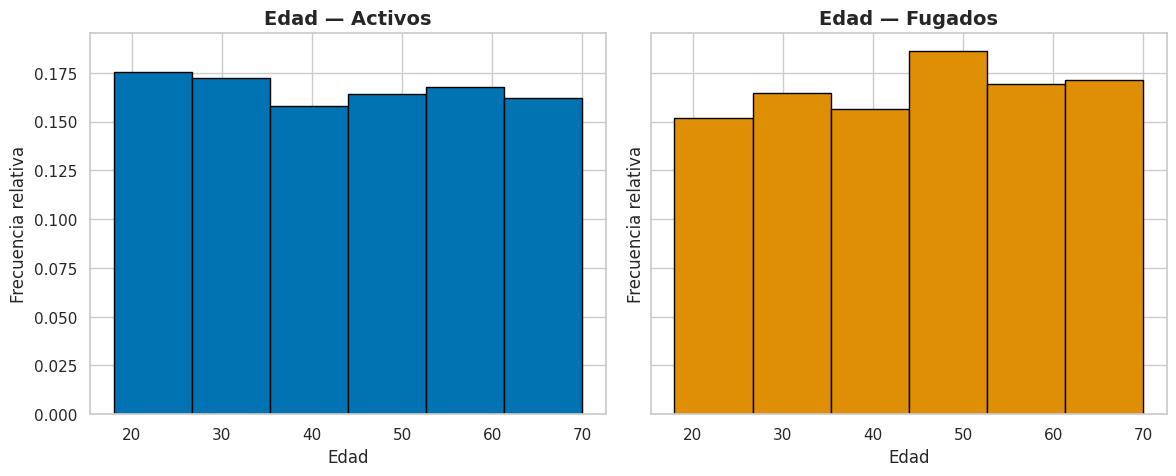

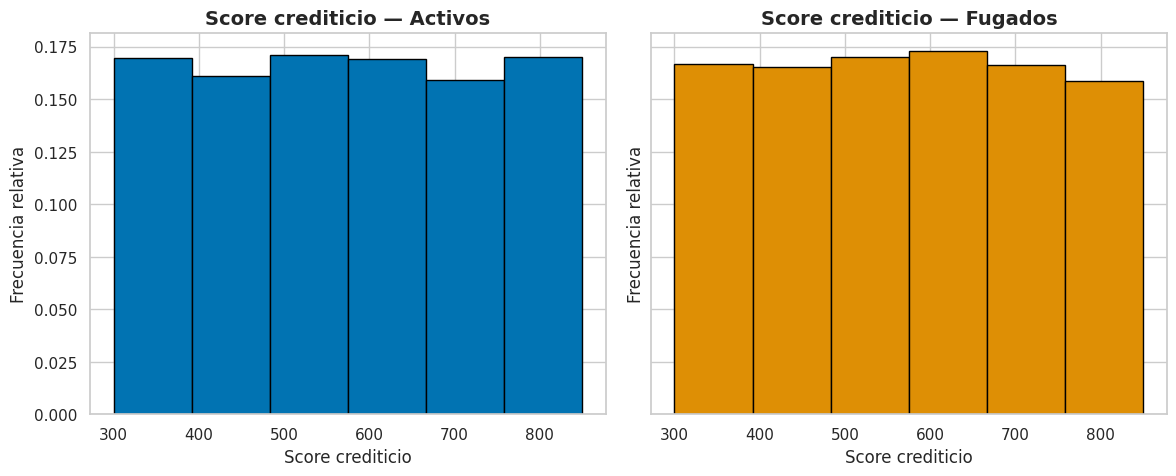

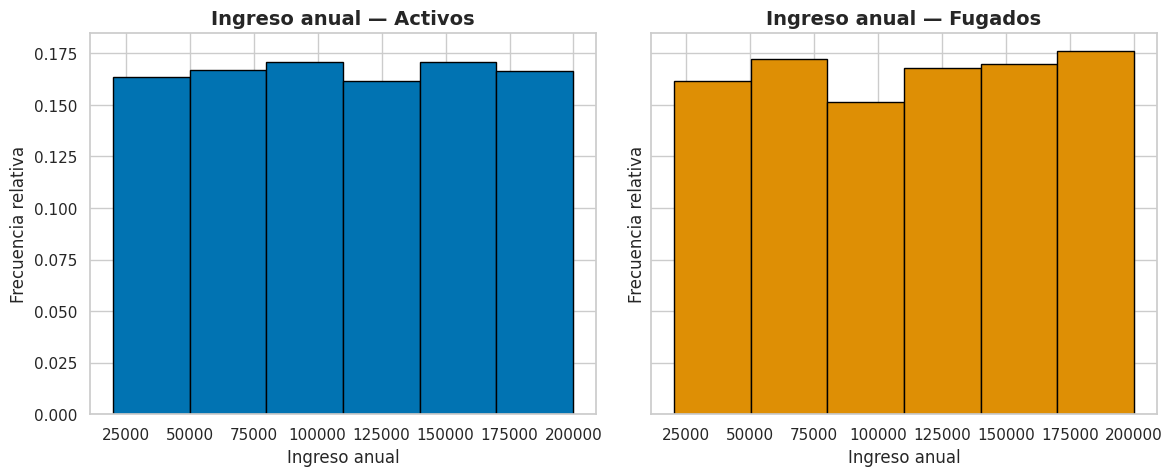

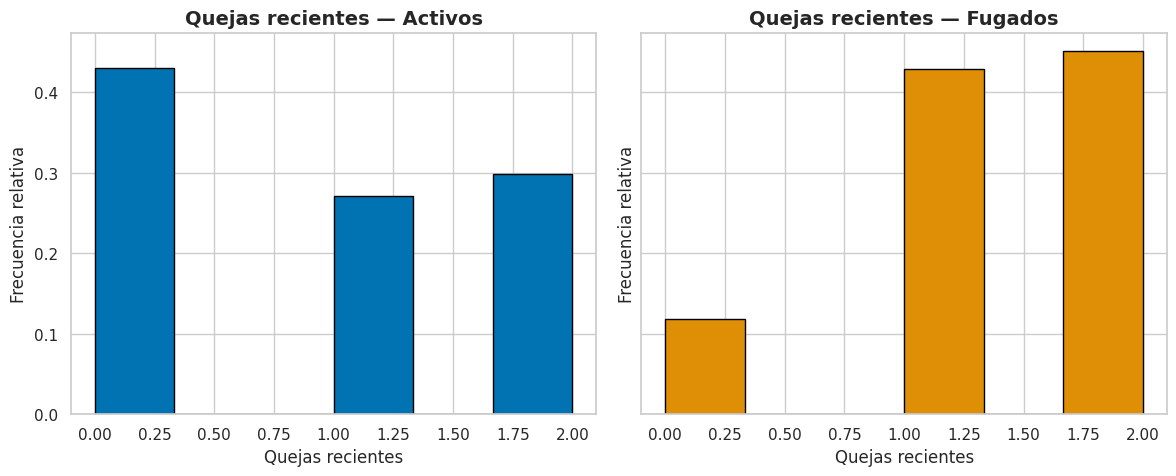

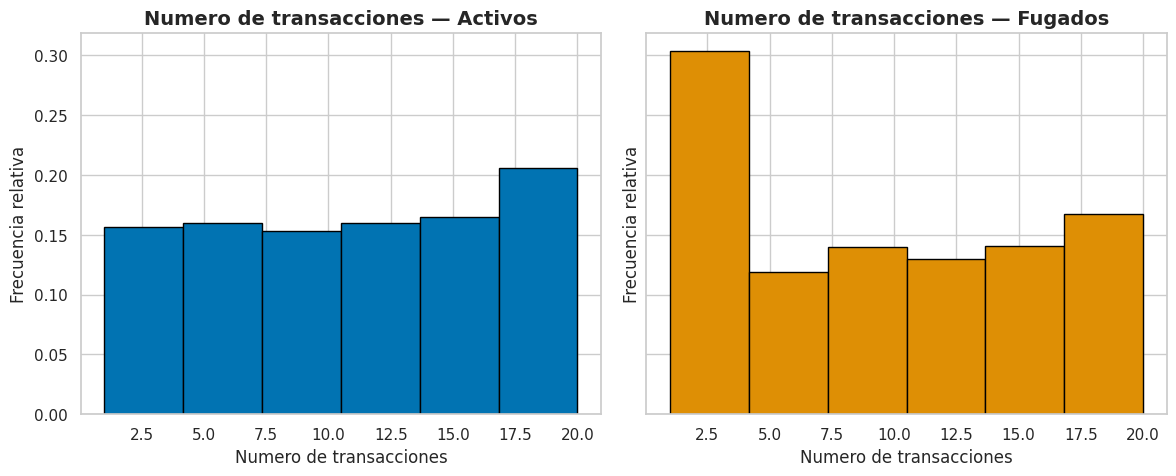

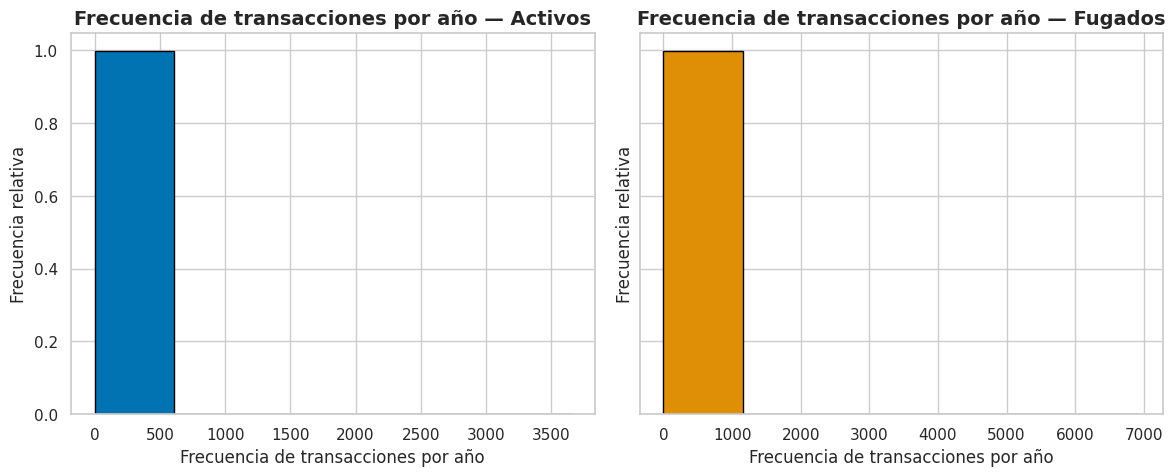

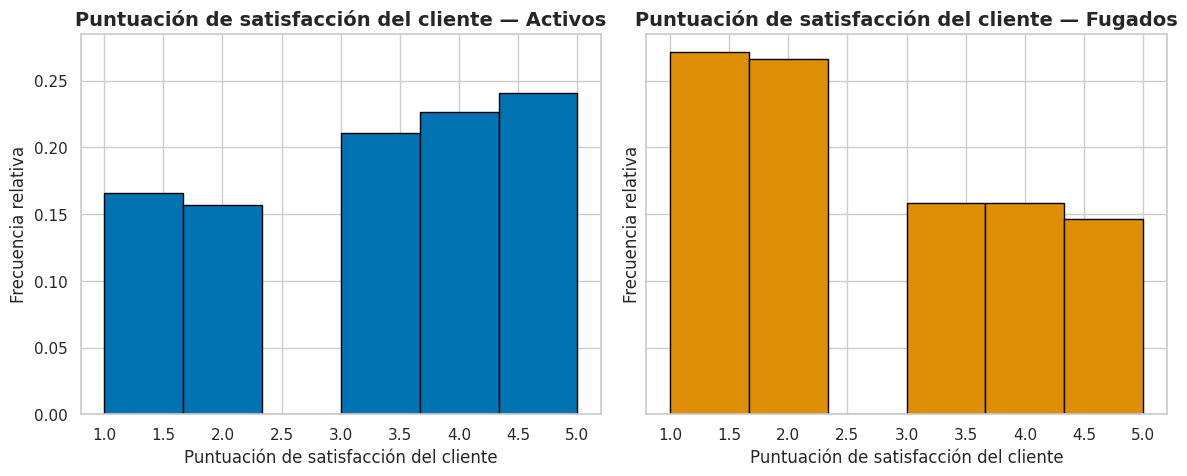

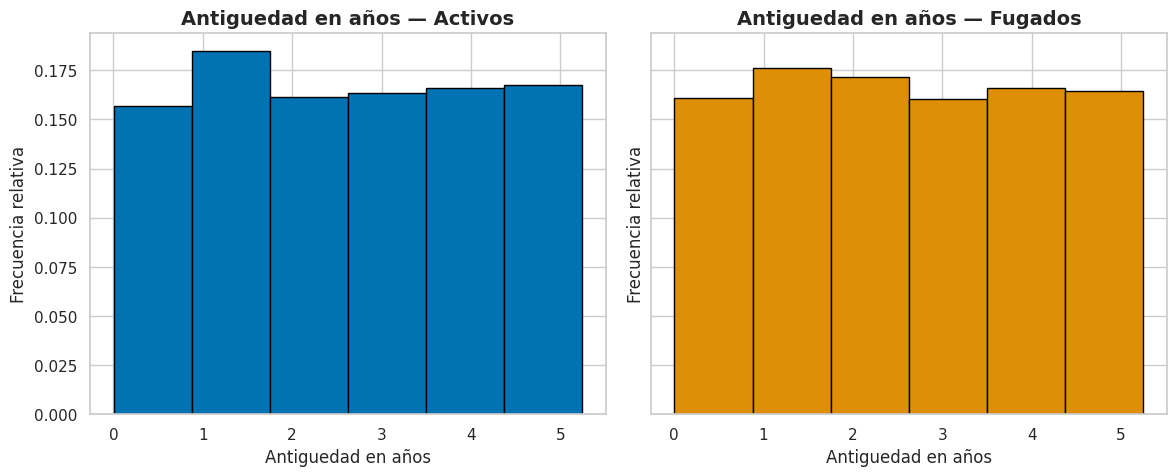

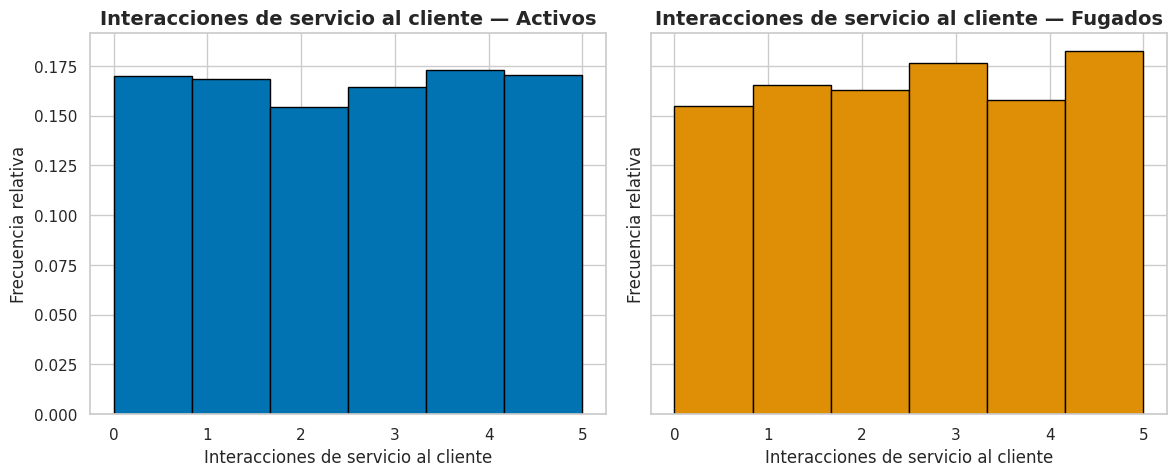

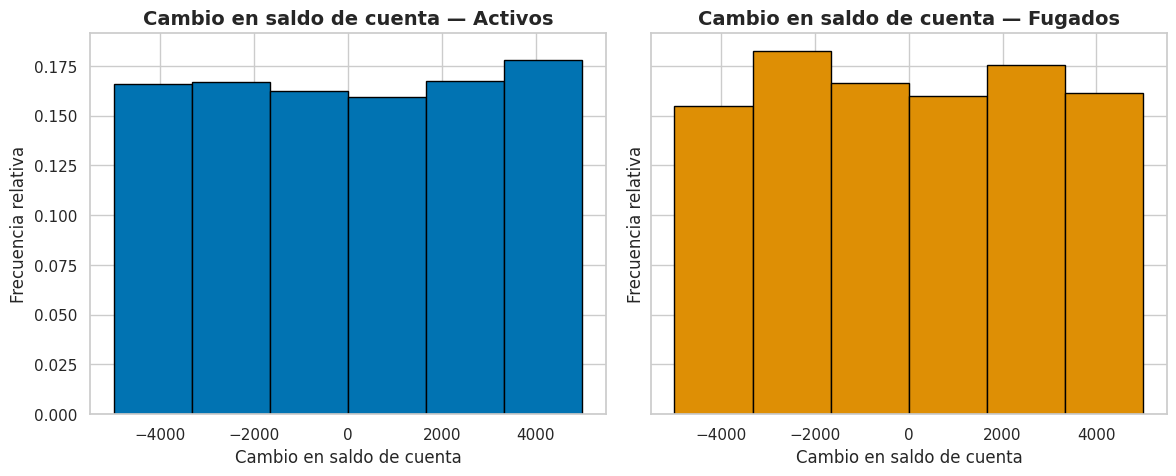

In [175]:
columnas=['Edad','Score crediticio','Ingreso anual','Quejas recientes','Numero de transacciones',
                       'Frecuencia de transacciones por año','Puntuación de satisfacción del cliente',
                       'Antiguedad en años','Interacciones de servicio al cliente','Cambio en saldo de cuenta']

for col in columnas:
    graficar_histograma_separado_por_fuga(df, col)

**Boxplots**

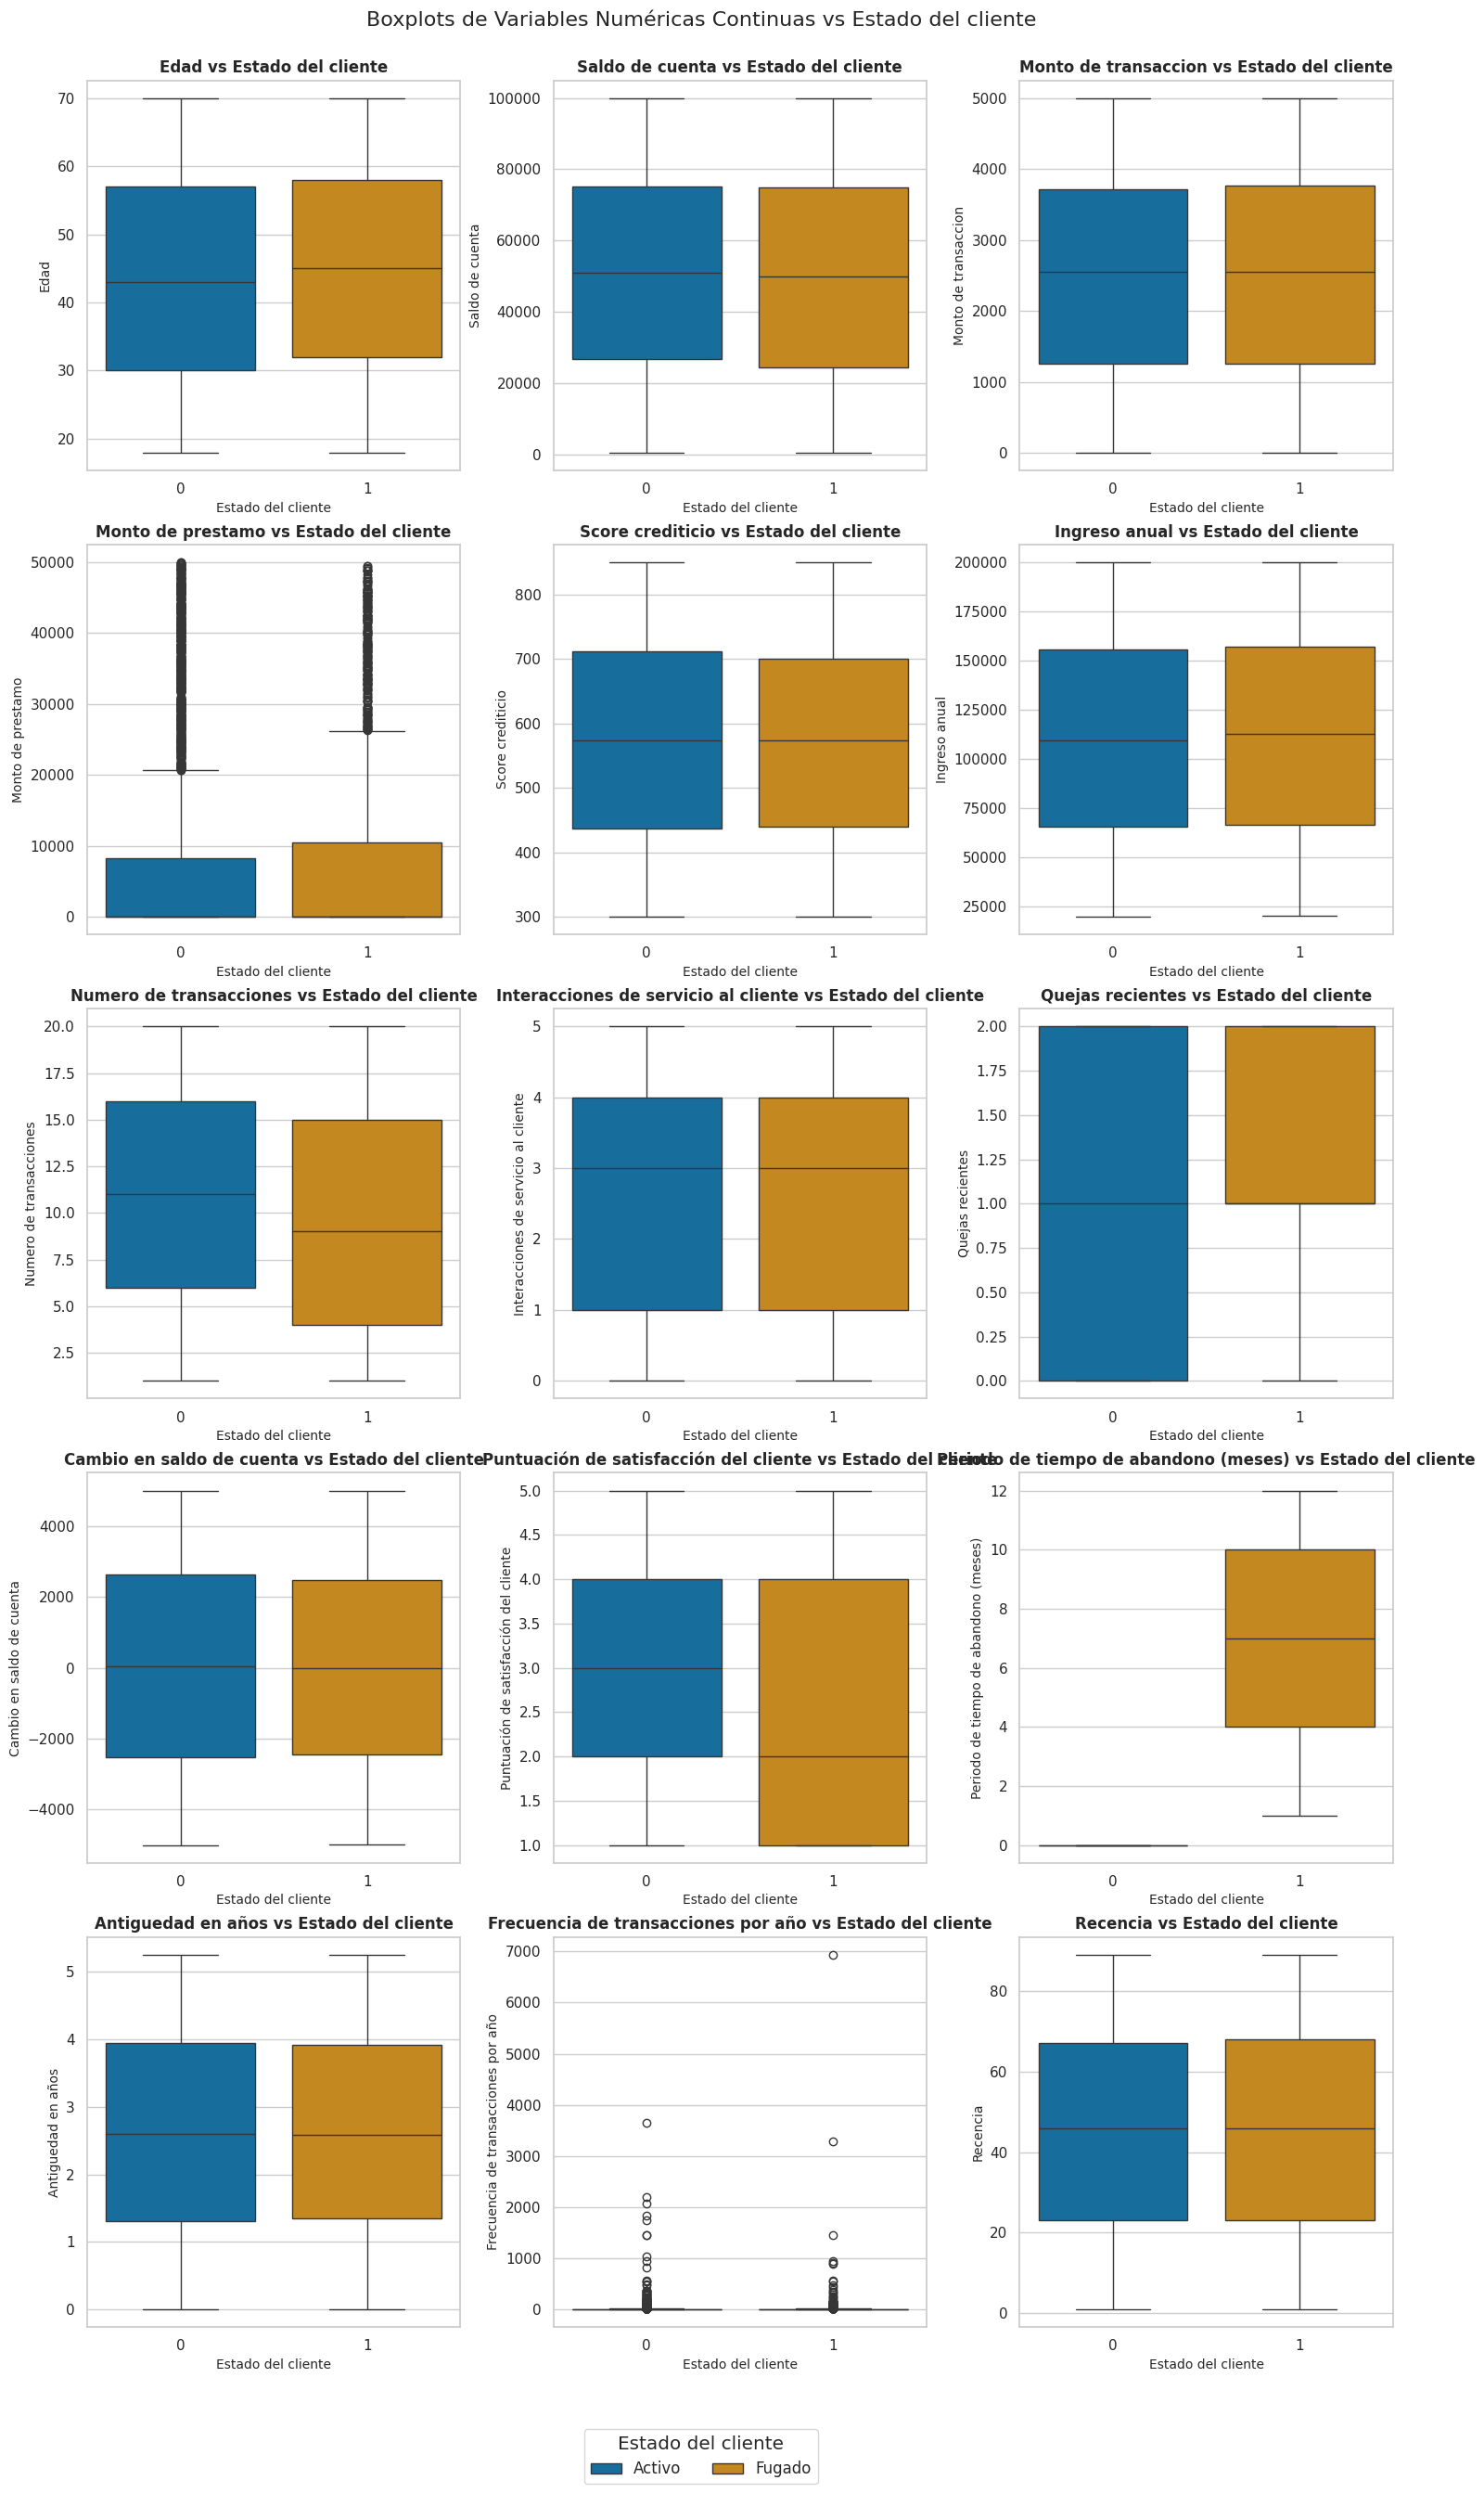

In [176]:
num_vars = len(numerical_continuous)

# Configurar número de filas y columnas para subplots
cols = 3
rows = math.ceil(num_vars / cols)

# Crear figura agrupada
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows),constrained_layout=True)
fig.suptitle('Boxplots de Variables Numéricas Continuas vs Estado del cliente', y=1.02, fontsize=16)

# Aplanar los ejes en caso de que haya más de 1 fila
axes = axes.flatten()

# Graficar cada variable en su subplot
for i, col in enumerate(numerical_continuous):
    sns.boxplot(x='Estado del cliente', y=col, data=df, ax=axes[i],hue='Estado del cliente',palette=palette)
    axes[i].set_title(f'{col.capitalize()} vs Estado del cliente')
    axes[i].set_xlabel('Estado del cliente')
    axes[i].set_ylabel(col.capitalize())
    axes[i].legend_.remove()

# Eliminar ejes vacíos si hay más subplots que variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#plt.tight_layout()
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Activo', 'Fugado'], title='Estado del cliente',
           loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=2)
#plt.legend(title='Estado del cliente', labels=['No', 'Sí'])
plt.show()

**Al analizar las variables numericas, comparando los clientes activos con los fugados, se encuentra que**

* Respecto a la edad, existe cierta predisposición de las personas mayores a 50 años de edad a fugarse.
* La mayor cantidad de clientes fugados (80%), realizó más de una queja recientemente. Mientras que, en los clientes activos esta proporción es menor al 60%.
* Más del 70% de los clientes activos mantienen una puntuación de satisfacción del cliente mayor a 3 puntos, mientras que los fugados apenas supera el 40%.


**Correlación de variables**

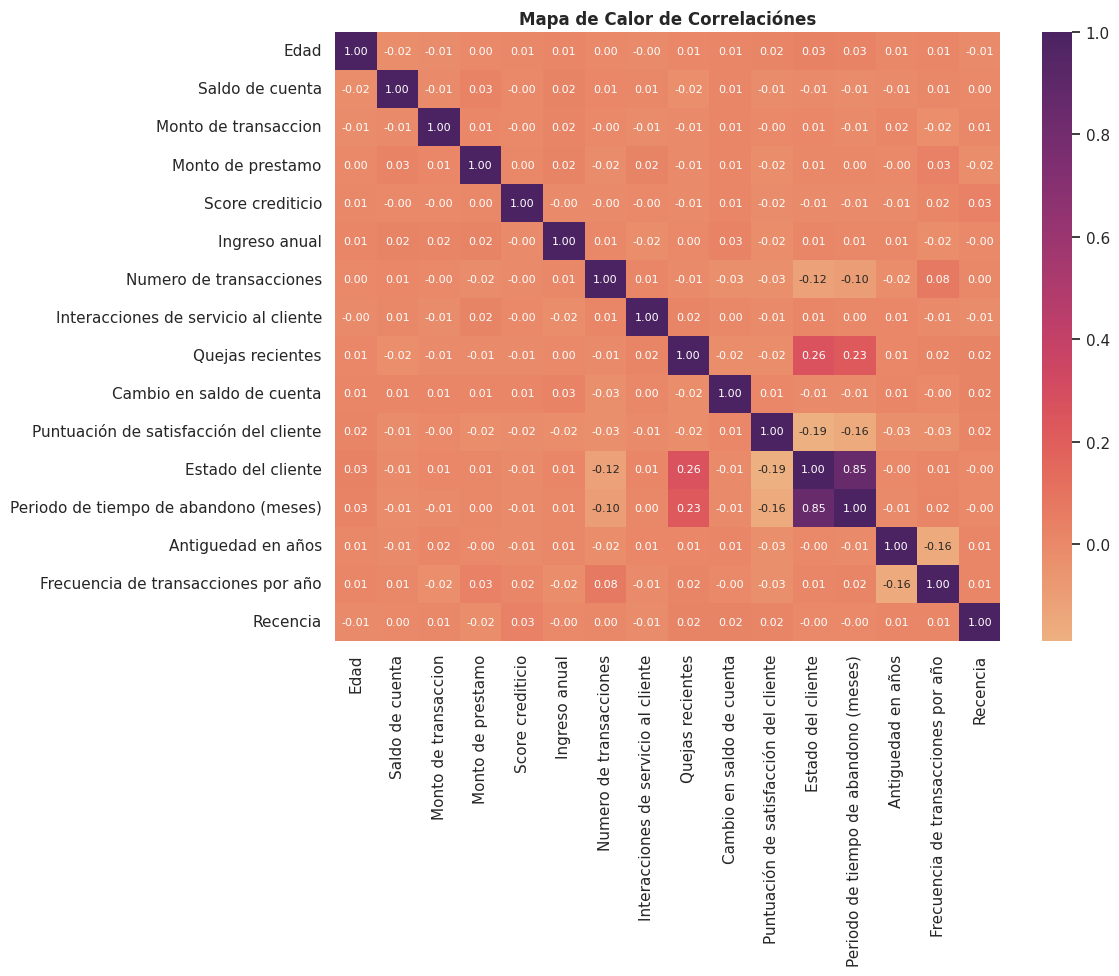

In [177]:
df_numerico = df[numerical_features]
correlacion = df_numerico.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='flare'
            ,fmt=".2f",annot_kws={"size":8})
plt.title('Mapa de Calor de Correlaciónes')
plt.show()

In [178]:
print("Correlaciones con la variable 'Estado del cliente':")
correlacion['Estado del cliente'].sort_values(ascending=False)

Correlaciones con la variable 'Estado del cliente':


,Estado del cliente
Estado del cliente,1.000000
Periodo de tiempo de abandono (meses),0.853376
Quejas recientes,0.261936
Edad,0.031706
Ingreso anual,0.013879
Interacciones de servicio al cliente,0.013756
Frecuencia de transacciones por año,0.012921
Monto de transaccion,0.008335
Monto de prestamo,0.005981
Antiguedad en años,-0.001155


El gráfico de correlación refuerza la idea de que existen variables que afectan de forma directa o inversa la fuga de clientes.
 * Es destacable la relación positiva presente entre la variable quejas recientes y Estado del cliente. Como se visualizó en gráficos anteriores, un aumento de quejas, podría potenciar la fuga de un cliente.
 * En un sentido inverso, la puntuación de satisfacción del cliente parece ser una variable que frena este fenómeno. Aquellos clientes que tienen una puntuación mayor de satisfacción, son más pasibles de permanecer activos en la cartera.
 * Otra variable que surge es el numero de transacciones durante el ultimo año. Al igual que la satisfacion del cliente, marca una relación negativa, por lo que podría inferirse que aquellos clientes con mayor numero de transacciones tienen menor probabilidad de fugarse.

## Variables categoricas

**Listado de variables**

In [179]:
categorical_features = [col for col in df.columns if col not in numerical_features]
columnas_a_excluir=['Cliente_ID','Fecha de transaccion','Fecha de apertura de cuenta','Fecha de ultima transaccion','Fecha_corte']
categorical_features = [
    col for col in categorical_features if col not in columnas_a_excluir
]
print('Variables categoricas:')
categorical_features

Variables categoricas:


['Genero',
 'Tipo de cuenta',
 'Tipo de transaccion',
 'Sucursal',
 'Es empleado',
 'Estado Civil',
 'Region',
 'Tendencia de actividad en cuenta',
 'Tuvo prestamo']

**Distribución de la variable objetivo**

Se define el campo **Estado del cliente**, como **variable objetivo**. Dado que permite discriminar en el dataset, los clientes que se encuentran activos en la cartera y aquellos que se fugaron.

Esta variable tiene los siguientes valores:

* 0 = Cliente Activo

* 1 = Cliente fugado




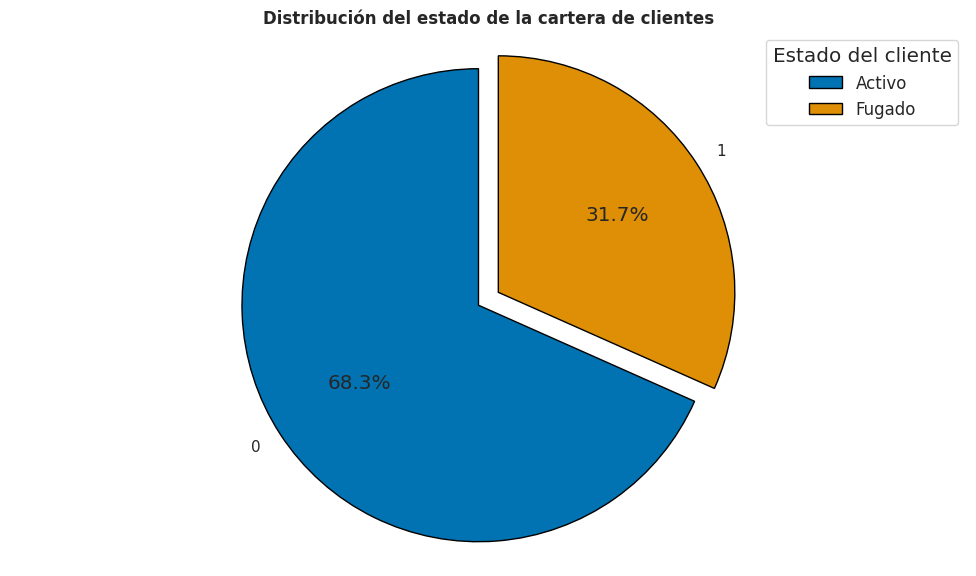

In [180]:
conteo = df['Estado del cliente'].value_counts()
labels = conteo.index
colors = palette[:len(labels)]
# Crear el gráfico circular
fig, ax = plt.subplots()
ax.pie(conteo, labels=labels,
       autopct='%1.1f%%', shadow=False, startangle=90,colors=colors,wedgeprops={'edgecolor': 'black'},
       explode=(0.1, 0))

ax.axis('equal')

plt.title('Distribución del estado de la cartera de clientes')
#plt.text(1.1, 0.5, '0 = Activo\n1 = Fugado', ha='center', va='center',
        # transform=fig.transFigure)
plt.legend(title='Estado del cliente', labels=['Activo', 'Fugado'])

plt.show()

*El 31% de la cartera de clientes se encuentra "Fugado".*

**Proporcion de Clientes bajo relacion de dependencia**

In [181]:
"Clientes bajo relacion de dependencia"
conteo = df.groupby('Es empleado')['Cliente_ID'].agg('count').reset_index()
total_clientes = df['Cliente_ID'].nunique()
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100


print('Proporción de clientes bajo relacion de dependencia:')
print(conteo)

Proporción de clientes bajo relacion de dependencia:
   Es empleado  Cliente_ID  Porcentaje
0        False        2457       49.14
1         True        2543       50.86


**Proporcion de Clientes por género**

In [182]:
conteo = df.groupby('Genero')['Cliente_ID'].agg('count').reset_index()
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100
print('Proporción de clientes según Genero:')
print(conteo)


Proporción de clientes según Genero:
   Genero  Cliente_ID  Porcentaje
0  Female        1658       33.16
1    Male        1686       33.72
2   Other        1656       33.12


**Proporción de Clientes por estado civil**

In [183]:
conteo = df.groupby('Estado Civil')['Cliente_ID'].agg('count').reset_index()
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100
print('Proporción de clientes según Estado Civil:')
print(conteo)


Proporción de clientes según Estado Civil:
  Estado Civil  Cliente_ID  Porcentaje
0     Divorced        1237       24.74
1      Married        1220       24.40
2       Single        1257       25.14
3      Widowed        1286       25.72


**Proporción Clientes por región**

In [184]:
conteo = df.groupby('Region')['Cliente_ID'].agg('count').reset_index()
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100
print('Proporción de clientes según Region:')
print(conteo)


Proporción de clientes según Region:
  Region  Cliente_ID  Porcentaje
0   East        1255       25.10
1  North        1242       24.84
2  South        1238       24.76
3   West        1265       25.30


**Proporción de Actividad de la cuenta**

In [185]:

conteo = df.groupby('Tendencia de actividad en cuenta')['Cliente_ID'].agg('count').reset_index()
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100

print('Proporción de clientes según Tendencia de actividad en cuenta:')
print(conteo)


Proporción de clientes según Tendencia de actividad en cuenta:
  Tendencia de actividad en cuenta  Cliente_ID  Porcentaje
0                       Decreasing        1591       31.82
1                       Increasing        1729       34.58
2                           Stable        1680       33.60


**Analisis de la tasa de fuga de clientes por variable categórica**

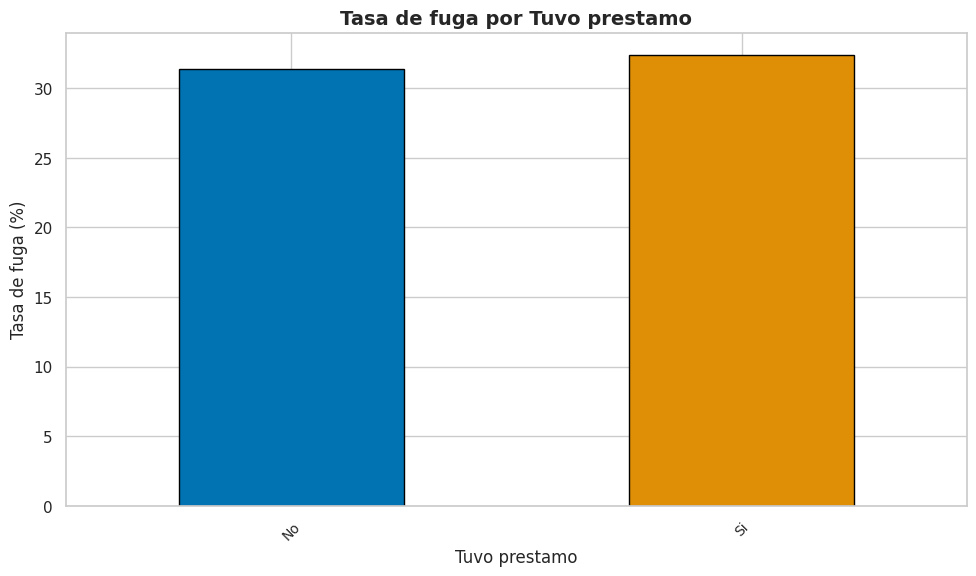

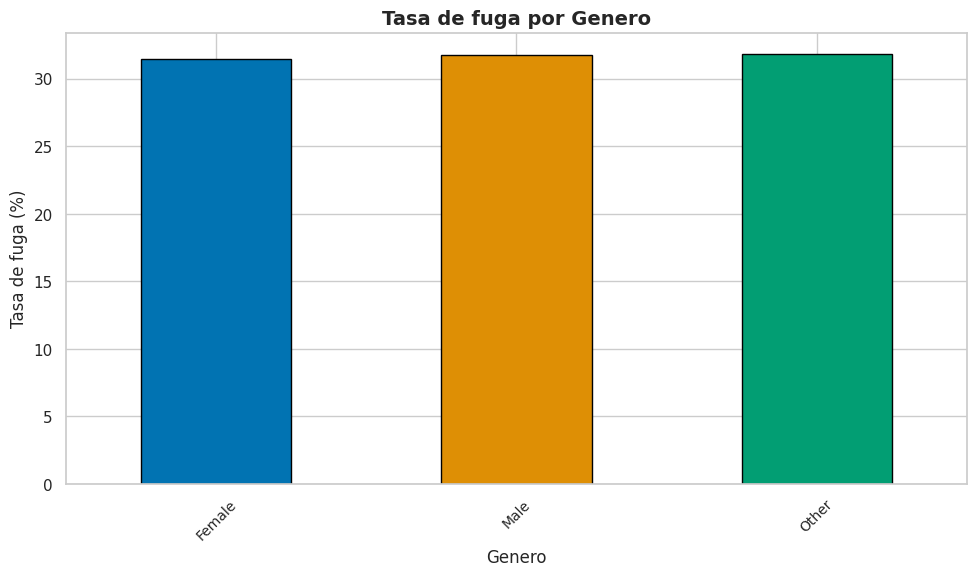

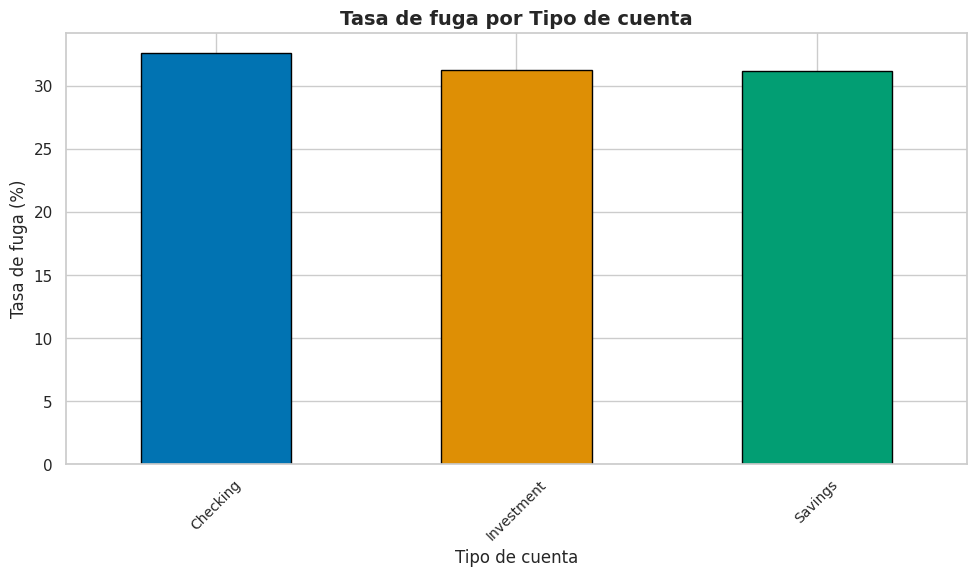

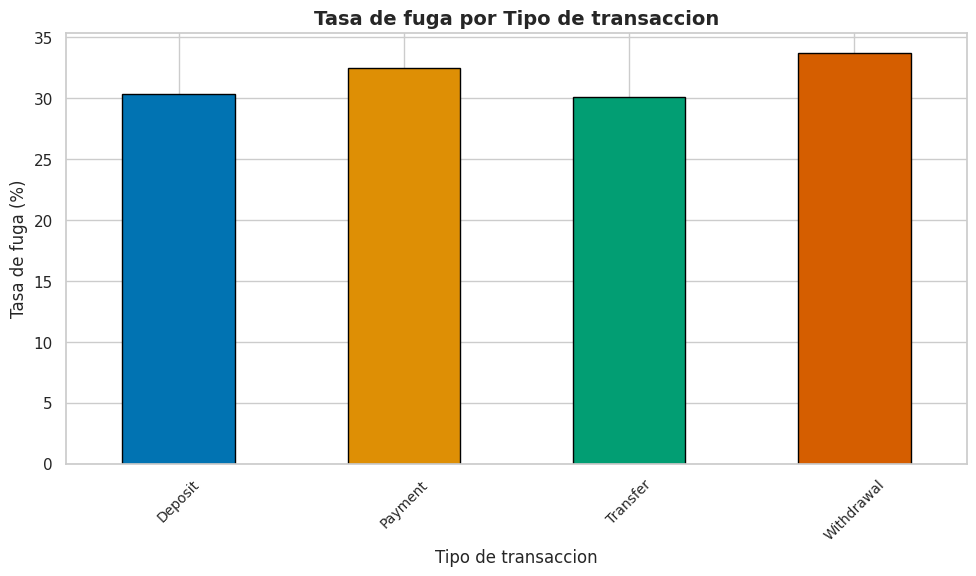

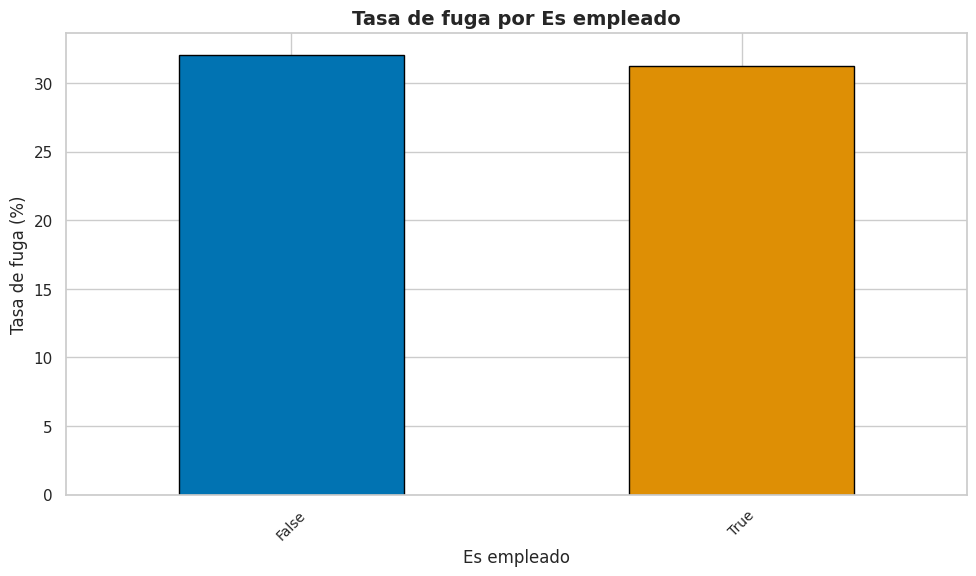

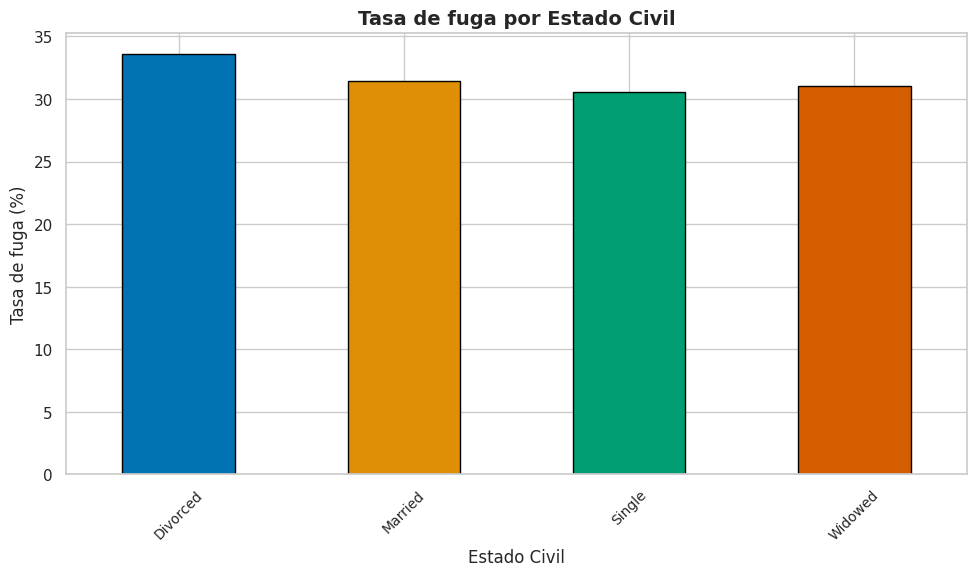

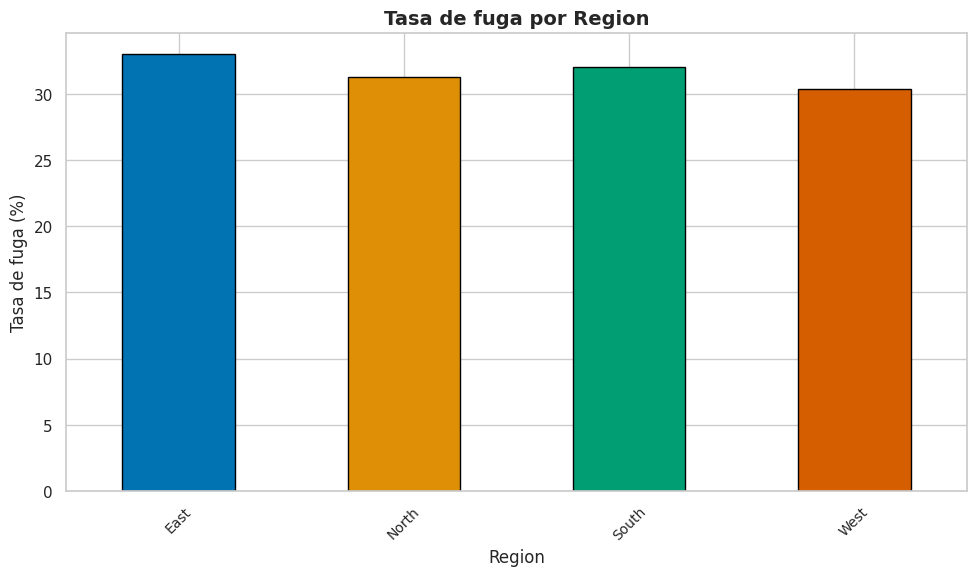

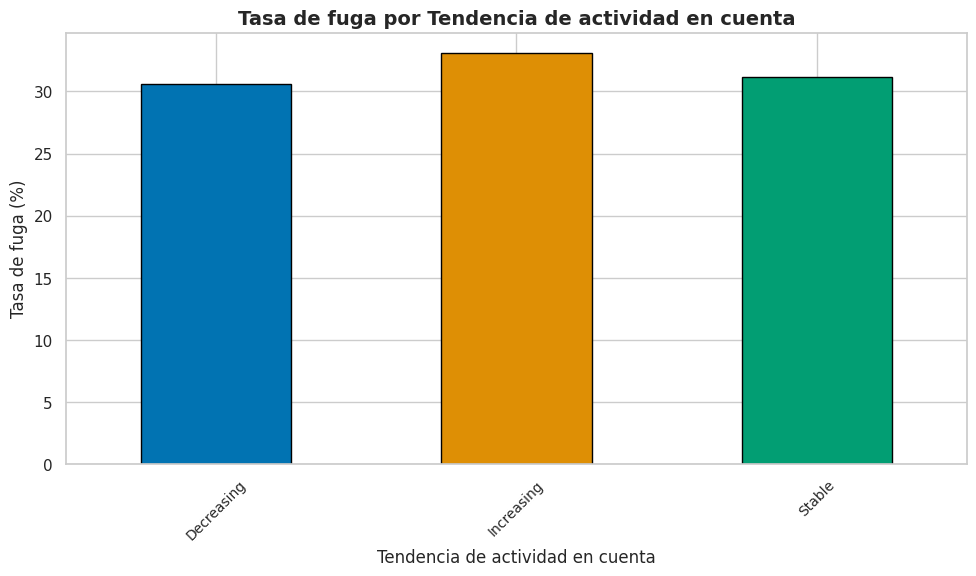

In [186]:


categoricas = [
    'Tuvo prestamo', 'Genero', 'Tipo de cuenta', 'Tipo de transaccion',
    'Es empleado', 'Estado Civil', 'Region', 'Tendencia de actividad en cuenta'
]

colormap = plt.get_cmap('viridis')


for col in categoricas:

    tasa = df.groupby(col)['Estado del cliente'].mean() * 100



    colors = palette[:len(tasa)]


    fig, ax = plt.subplots()
    bars = tasa.plot(kind='bar', ax=ax, edgecolor='black', color=colors
                     )
    ax.set_title(f'Tasa de fuga por {col}', fontsize=14)
    ax.set_ylabel('Tasa de fuga (%)', fontsize=12)
    ax.set_xlabel(col, fontsize=12)


    ax.tick_params(axis='x', rotation=45, labelsize=10)

    plt.tight_layout()


    plt.show()


**Variables categóricas por Estado del cliente**

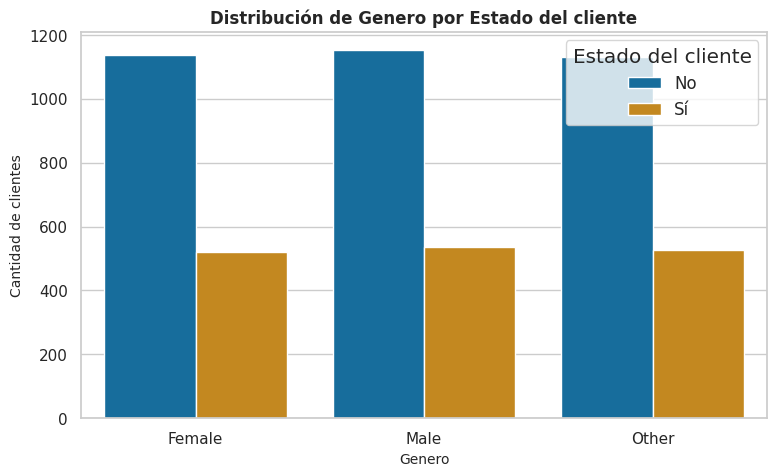

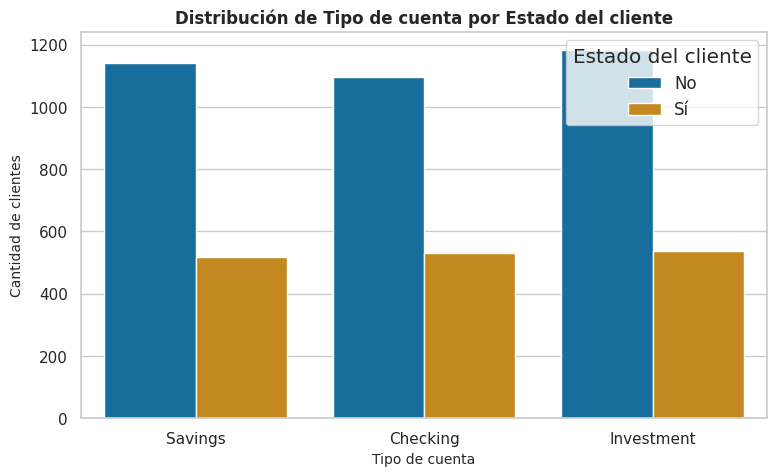

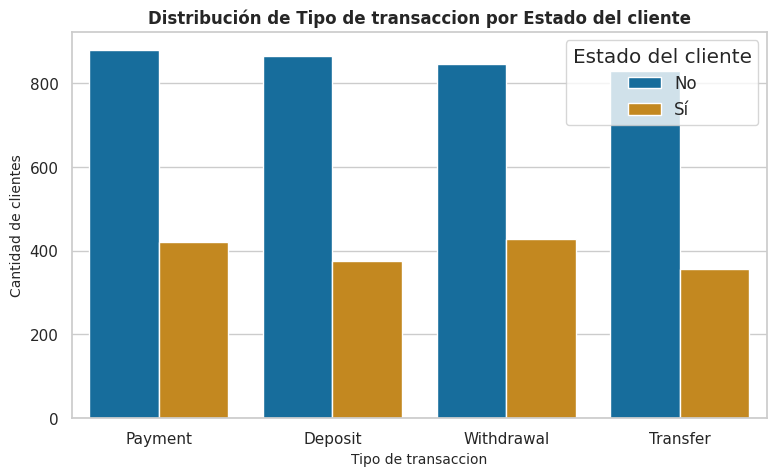

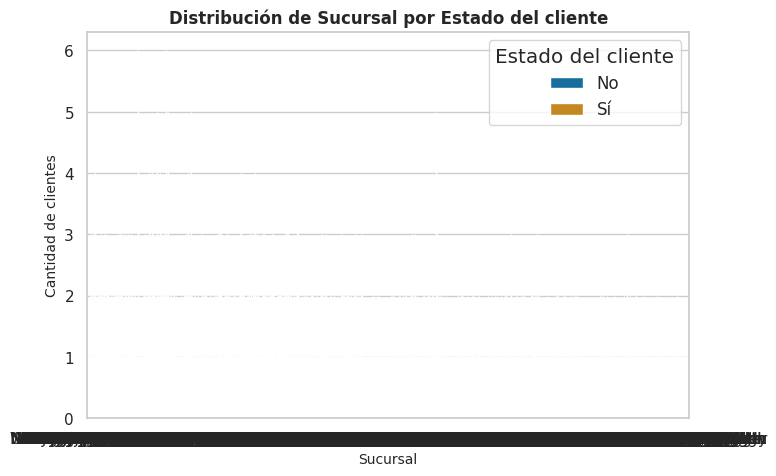

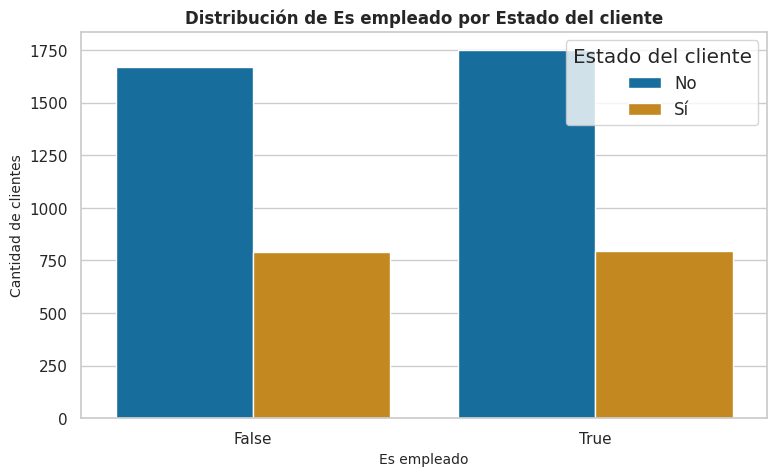

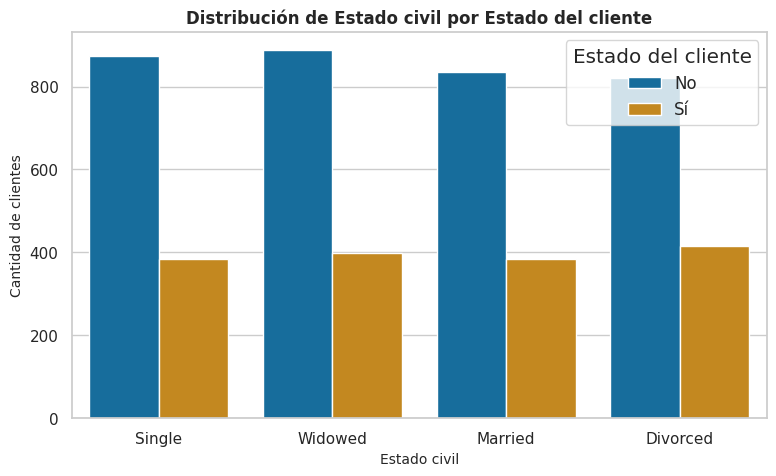

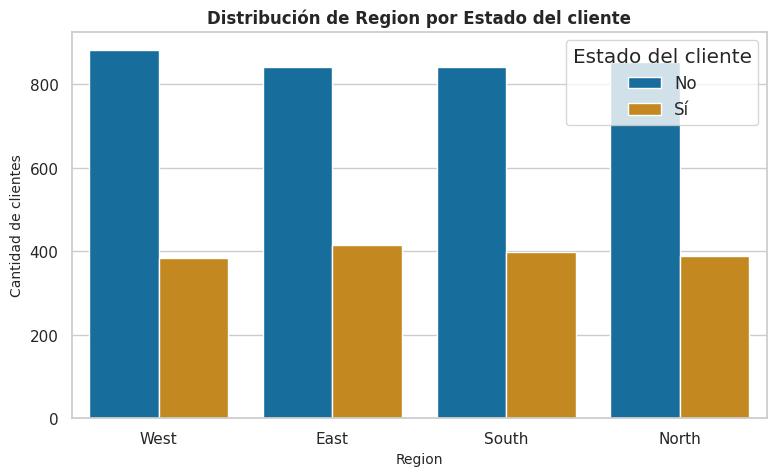

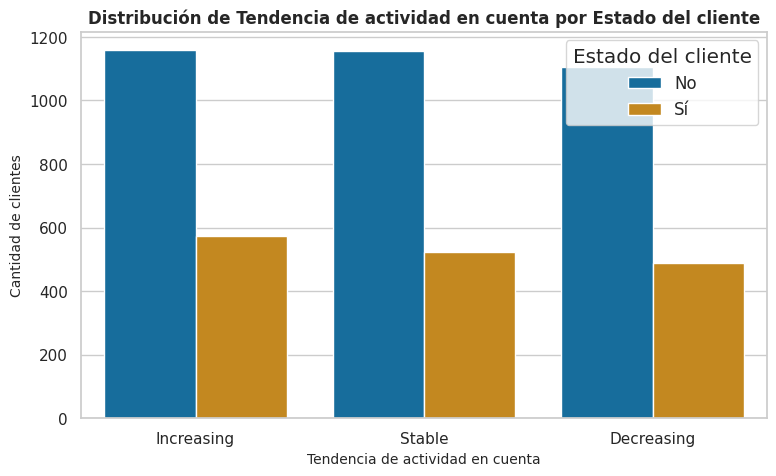

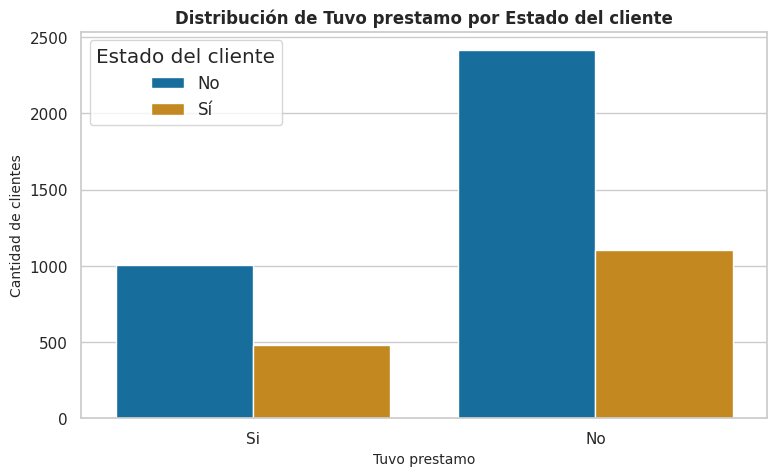

In [187]:
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, hue='Estado del cliente')
    plt.title(f'Distribución de {col.capitalize()} por Estado del cliente')
    plt.xlabel(col.capitalize())
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Estado del cliente', labels=['No', 'Sí'])
    plt.show()

**Al observarse las variables categoricas, no se destacan valores que puedan inferir una mayor probabilidad de fuga.**
Las variables categóricas del dataset presentann distribuciones muy uniformes, por lo que se complejiza obtener conclusiones a partir de estas.

# Preprocesamiento de datos

##Variables a escalar y codificar

In [188]:
numerical_features_for_scaling = numerical_continuous
excluir = ['Periodo de tiempo de abandono (meses)'] #Se excluye esta variable ya que es una caracteristica que podría representar lo mismo que la variable objetivo. Si tiene meses se abandono el cliente es fugado.
numerical_features_for_scaling= [
    col for col in numerical_features_for_scaling if col not in excluir
]

categorical_features_for_encoding = categorical_features

In [189]:
features = numerical_features_for_scaling + categorical_features_for_encoding
target = 'Estado del cliente'

print(f"\nCaracterísticas numéricas a escalar: {numerical_features_for_scaling}")
print(f"Características categóricas a codificar (OneHot): {categorical_features_for_encoding}")
print(f"Variable objetivo: {target}")
print("\n")


Características numéricas a escalar: ['Edad', 'Saldo de cuenta', 'Monto de transaccion', 'Monto de prestamo', 'Score crediticio', 'Ingreso anual', 'Numero de transacciones', 'Interacciones de servicio al cliente', 'Quejas recientes', 'Cambio en saldo de cuenta', 'Puntuación de satisfacción del cliente', 'Antiguedad en años', 'Frecuencia de transacciones por año', 'Recencia']
Características categóricas a codificar (OneHot): ['Genero', 'Tipo de cuenta', 'Tipo de transaccion', 'Sucursal', 'Es empleado', 'Estado Civil', 'Region', 'Tendencia de actividad en cuenta', 'Tuvo prestamo']
Variable objetivo: Estado del cliente




**Definición de características (X) y la variable objetivo (y)**

In [190]:
X = df[features]
y = df[target]

**Preprocesador**


In [191]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_for_scaling),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_encoding)
    ],
    remainder='passthrough' # Si hubiera columnas no especificadas, las dejaría pasar (¡cuidado!)
    # O usa remainder='drop' si quieres asegurar que solo se usen las especificadas
)


In [192]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Edad', 'Saldo de cuenta',
                                  'Monto de transaccion', 'Monto de prestamo',
                                  'Score crediticio', 'Ingreso anual',
                                  'Numero de transacciones',
                                  'Interacciones de servicio al cliente',
                                  'Quejas recientes',
                                  'Cambio en saldo de cuenta',
                                  'Puntuación de satisfacción del cliente',
                                  'Antiguedad en años',
                                  'Frecuencia de transacciones por año',
                                  'Recencia']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Genero', 'Tipo de cuenta',
                                  'Tipo de transaccion', 'Sucursal',
                                  'Es empleado', 'Estado Civil', 'Region',
                                  'Tendencia de actividad en cuenta',
                                  'Tuvo prestamo'])])

# División de Datos

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [194]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (3750, 23)
Tamaño del conjunto de prueba (X_test): (1250, 23)
Tamaño del conjunto de entrenamiento (y_train): (3750,)
Tamaño del conjunto de prueba (y_test): (1250,)


In [195]:
print("\nDistribución de la variable objetivo en Train vs Test:")
print(f"Train: \n{y_train.value_counts(normalize=True)}")
print(f"Test: \n{y_test.value_counts(normalize=True)}")


Distribución de la variable objetivo en Train vs Test:
Train: 
Estado del cliente
0    0.683467
1    0.316533
Name: proportion, dtype: float64
Test: 
Estado del cliente
0    0.6832
1    0.3168
Name: proportion, dtype: float64


#Construcción y Entrenamiento del Modelo
Se utiliza el **modelo Random Forest** porque maneja bien conjuntos de datos con múltiples variables y relaciones no lineales, incluso con distribución uniforme (como en este dataset). Aunque la variable objetivo está desbalanceada, el modelo permite usar técnicas como class_weight='balanced'. Además, ofrece buenas métricas de desempeño sin requerir mucha preparación de datos

**Pipeline**

In [196]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))

])

**Entrenamiento**

In [197]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Edad', 'Saldo de cuenta',
                                                   'Monto de transaccion',
                                                   'Monto de prestamo',
                                                   'Score crediticio',
                                                   'Ingreso anual',
                                                   'Numero de transacciones',
                                                   'Interacciones de servicio '
                                                   'al cliente',
                                                   'Quejas recientes',
                                                   'Cambio en saldo de cuenta',
                                                   'Puntuación de satisfacción '
                                                   'del cliente',
                                                   'Antiguedad en años',
                                                   'Frecuencia de '
                                                   'transacciones por año',
                                                   'Recencia']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genero', 'Tipo de cuenta',
                                                   'Tipo de transaccion',
                                                   'Sucursal', 'Es empleado',
                                                   'Estado Civil', 'Region',
                                                   'Tendencia de actividad en '
                                                   'cuenta',
                                                   'Tuvo prestamo'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

# Evaluación del Modelo

**Predicción**

In [198]:
y_pred = model_pipeline.predict(X_test)

y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

# Ajuste de umbral
umbral = 0.3
y_pred = (y_pred_proba >= umbral).astype(int)

**Accuracy**

In [199]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score:")
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

Accuracy Score:
Accuracy en el conjunto de prueba: 0.6024


**Matriz de confusión**

Matriz de Confusión


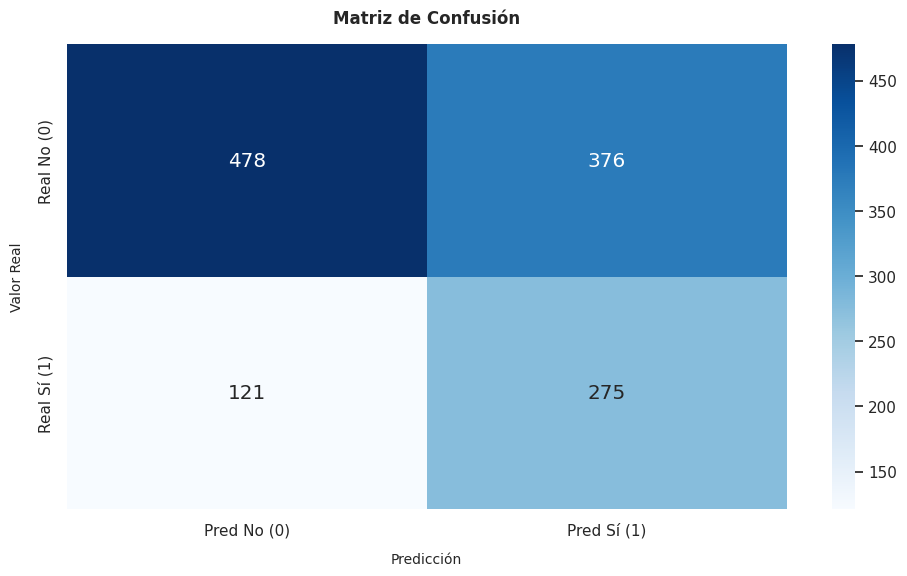

Verdaderos Negativos (TN): 478
Falsos Positivos (FP): 376
Falsos Negativos (FN): 121
Verdaderos Positivos (TP): 275


In [200]:

print("Matriz de Confusión")
cm = confusion_matrix(y_test, y_pred)


plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Pred No (0)', 'Pred Sí (1)'],
    yticklabels=['Real No (0)', 'Real Sí (1)']
)


plt.xlabel('Predicción', labelpad=10)
plt.ylabel('Valor Real', labelpad=10)
plt.title('Matriz de Confusión', pad=15)

plt.tight_layout()
plt.show()


print(f"Verdaderos Negativos (TN): {cm[0,0]}")
print(f"Falsos Positivos (FP): {cm[0,1]}")
print(f"Falsos Negativos (FN): {cm[1,0]}")
print(f"Verdaderos Positivos (TP): {cm[1,1]}")

**Reporte de Clasificación (Precisión, Recall, F1-Score)**

In [201]:
target_names = ['Activo)', 'Fugado']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Activo)       0.80      0.56      0.66       854
      Fugado       0.42      0.69      0.53       396

    accuracy                           0.60      1250
   macro avg       0.61      0.63      0.59      1250
weighted avg       0.68      0.60      0.62      1250



**Curva ROC y AUC**

In [202]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

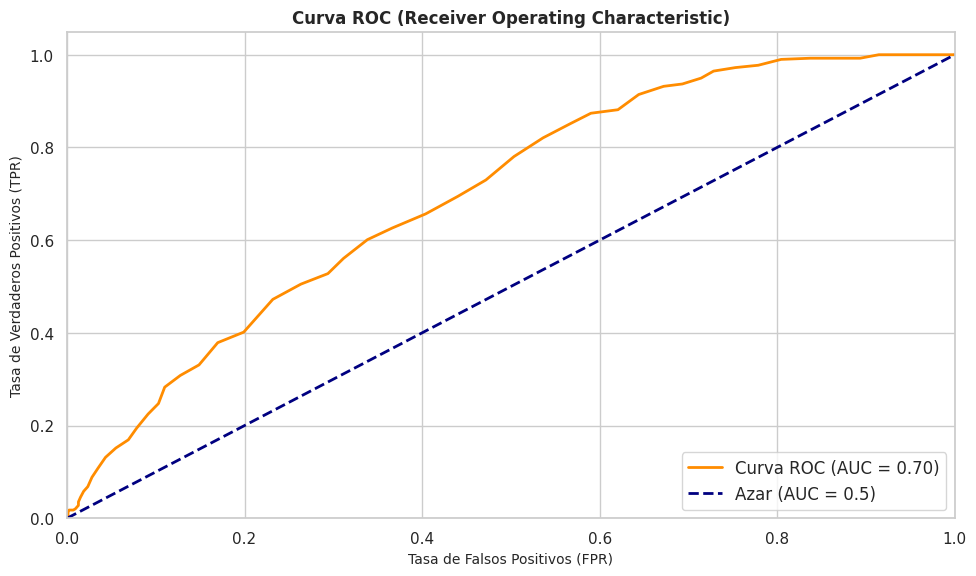

In [203]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

In [204]:
print(f"Área Bajo la Curva ROC (AUC): {roc_auc:.4f}")

Área Bajo la Curva ROC (AUC): 0.6971


# Análisis de Importancia de Características

In [205]:
rf_classifier = model_pipeline.named_steps['classifier']
importances = rf_classifier.feature_importances_

In [206]:
# Obtener el transformador OneHotEncoder del preprocesador
ohe_transformer = model_pipeline.named_steps['preprocessor'].transformers_[1][1]
# Obtener las categorías de las características codificadas
ohe_categories = ohe_transformer.categories_

In [207]:
ohe_categories

[array(['Female', 'Male', 'Other'], dtype=object),
 array(['Checking', 'Investment', 'Savings'], dtype=object),
 array(['Deposit', 'Payment', 'Transfer', 'Withdrawal'], dtype=object),
 array(['Aaronberg', 'Aaronfort', 'Aaronmouth', ..., 'Zacharyfort',
        'Zacharyland', 'Zavalafort'], dtype=object),
 array([False,  True]),
 array(['Divorced', 'Married', 'Single', 'Widowed'], dtype=object),
 array(['East', 'North', 'South', 'West'], dtype=object),
 array(['Decreasing', 'Increasing', 'Stable'], dtype=object),
 array(['No', 'Si'], dtype=object)]

In [208]:

ohe_feature_names = []
for i, col in enumerate(categorical_features_for_encoding):
    for category in ohe_categories[i]:
        ohe_feature_names.append(f"{col}_{category}")

In [209]:
ohe_feature_names

['Genero_Female',
 'Genero_Male',
 'Genero_Other',
 'Tipo de cuenta_Checking',
 'Tipo de cuenta_Investment',
 'Tipo de cuenta_Savings',
 'Tipo de transaccion_Deposit',
 'Tipo de transaccion_Payment',
 'Tipo de transaccion_Transfer',
 'Tipo de transaccion_Withdrawal',
 'Sucursal_Aaronberg',
 'Sucursal_Aaronfort',
 'Sucursal_Aaronmouth',
 'Sucursal_Aarontown',
 'Sucursal_Abigailfort',
 'Sucursal_Adamhaven',
 'Sucursal_Adammouth',
 'Sucursal_Adamsfort',
 'Sucursal_Adamsport',
 'Sucursal_Adamsshire',
 'Sucursal_Adamston',
 'Sucursal_Adkinsbury',
 'Sucursal_Aguilarbury',
 'Sucursal_Aguilarport',
 'Sucursal_Aimeeland',
 'Sucursal_Alanberg',
 'Sucursal_Alanview',
 'Sucursal_Alejandromouth',
 'Sucursal_Alexanderborough',
 'Sucursal_Alexanderburgh',
 'Sucursal_Alexanderstad',
 'Sucursal_Alexandrabury',
 'Sucursal_Alexandraland',
 'Sucursal_Alexandraview',
 'Sucursal_Alexisland',
 'Sucursal_Aliciaburgh',
 'Sucursal_Aliciachester',
 'Sucursal_Aliciatown',
 'Sucursal_Alisonport',
 'Sucursal_Alison

In [210]:

final_feature_names = numerical_features_for_scaling + ohe_feature_names

In [211]:
if len(importances) == len(final_feature_names):
    feature_importance_df = pd.DataFrame({'Feature': final_feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("Importancia de las características según Random Forest:")
    print(feature_importance_df.head(15)) # Mostrar las 15 más importantes


Importancia de las características según Random Forest:
                                   Feature  Importance
8                         Quejas recientes    0.070974
12     Frecuencia de transacciones por año    0.047717
6                  Numero de transacciones    0.044005
2                     Monto de transaccion    0.042517
9                Cambio en saldo de cuenta    0.042174
10  Puntuación de satisfacción del cliente    0.041072
5                            Ingreso anual    0.040845
4                         Score crediticio    0.040356
1                          Saldo de cuenta    0.040120
11                      Antiguedad en años    0.039347
13                                Recencia    0.039229
0                                     Edad    0.038746
7     Interacciones de servicio al cliente    0.024412
3                        Monto de prestamo    0.018691
18               Tipo de cuenta_Investment    0.009431


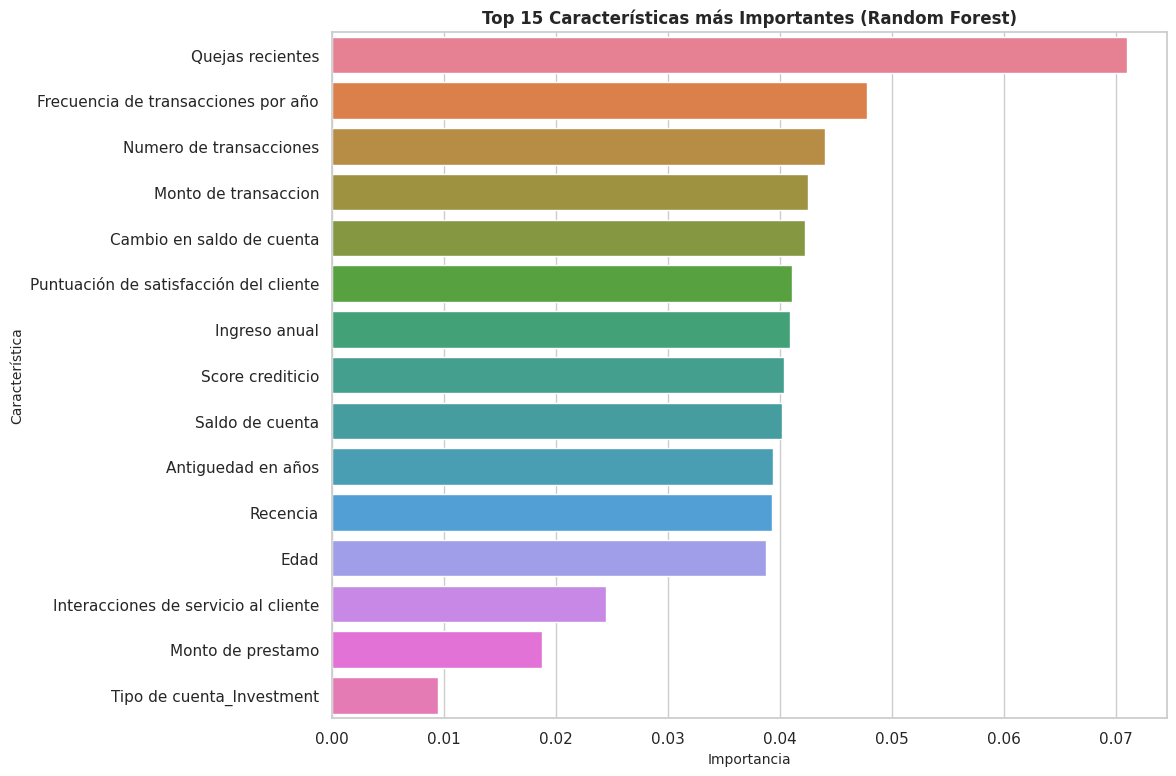

In [212]:

    # Graficar la importancia de las características
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), hue='Feature')
    plt.title('Top 15 Características más Importantes (Random Forest)')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.tight_layout()
    plt.show()

**Resumen de resultados**

In [213]:
print("Resumen de Resultados:")
print(f"- Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")
print(f"- AUC del modelo en el conjunto de prueba: {roc_auc:.4f}")


Resumen de Resultados:
- Accuracy del modelo en el conjunto de prueba: 0.6024
- AUC del modelo en el conjunto de prueba: 0.6971


#Conclusiones finales

Al utilizar el modelo, se ajustó el umbral de probabilidad, para mejorar el desempeño del mismo, teniendo en cuenta que los clientes del dataset "Fugados" son significativamente inferiores a los "Activos".

* El modelo logró un recall de 0.69 en la marca "Fugado", indicando que sí puede identificar grupos de fuga. Si bien no es tan preciso (incluye falsos positivos), se detecta la mayoría de los casos de fuga.

* El AUC de 0.6971 confirma que el modelo puede diferenciar razonablemente entre fugados y activos.

* Además, el modelo puede predecir con más de un 60% de probabilidad los casos de fuga.

* Las 3 caracteristicas más importantes del modelo son: Quejas recientes de los clientes, cantidad de transacciones al año, y el numero de transacciones totales.

* **Se logra rechazar la Hipotesis Nula:** *Los datos y variables existentes, no son suficientes para identificar a grupos de clientes con posibilidad de fuga, con más de un 60% de probabilidad del modelo..*

* **Se valida la Hipotesis Alternativa:** *Los datos y variables existentes, son suficientes para identificar a grupos de clientes con posibilidad de fuga, con más de un 60% de probabilidad del modelo.*

